<a href="https://colab.research.google.com/github/CM-007/pythonCode_DS/blob/main/2Forecasting_model_based_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/footfalls.csv')

In [3]:
data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


<Axes: >

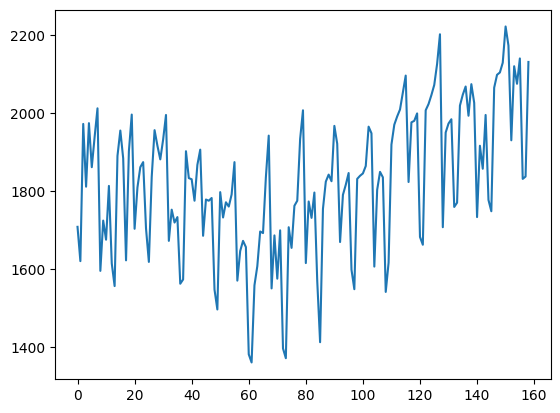

In [4]:
data.Footfalls.plot()

In [5]:
data.shape

(159, 17)

In [6]:
data.dtypes

Month             object
Footfalls          int64
t                  int64
log_footfalls    float64
t_square           int64
Jan                int64
Feb                int64
Mar                int64
Apr                int64
May                int64
Jun                int64
Jul                int64
Aug                int64
Sep                int64
Oct                int64
Nov                int64
Dec                int64
dtype: object

In [7]:
data['Date'] = pd.to_datetime(data.Month,format='%b-%y')

In [8]:
data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01


In [10]:
data.dtypes

Month                    object
Footfalls                 int64
t                         int64
log_footfalls           float64
t_square                  int64
Jan                       int64
Feb                       int64
Mar                       int64
Apr                       int64
May                       int64
Jun                       int64
Jul                       int64
Aug                       int64
Sep                       int64
Oct                       int64
Nov                       int64
Dec                       int64
Date             datetime64[ns]
dtype: object

In [12]:
data.shape

(159, 18)

In [13]:
# Extracting Day, Weekday name, month name, year from the date col. using date functions from pandas - only for plotting purpose
data["month"] = data.Date.dt.strftime("%b") # month extraction
data["year"] = data.Date.dt.strftime("%y") # year extraction

In [14]:
data.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,91
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,91
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,91
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,91
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,91


<Axes: xlabel='year', ylabel='Footfalls'>

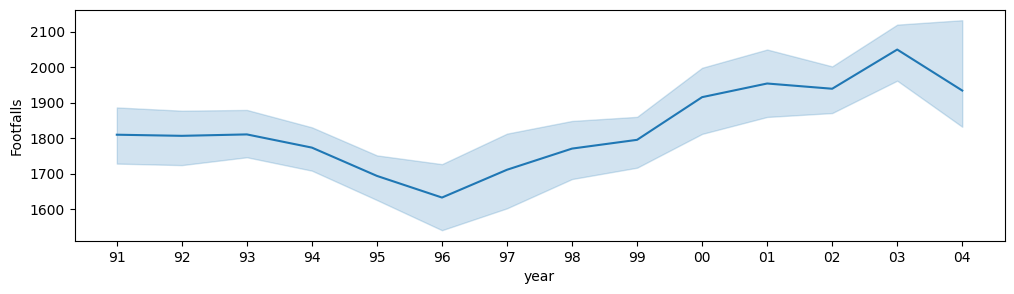

In [17]:
plt.figure(figsize=(12,3))
sns.lineplot(x='year',y='Footfalls',data=data)

# **Data Splitting**

In [18]:
train = data.head(147)
test = data.tail(12)

In [19]:
train

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,91
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,91
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,91
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,91
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Nov-02,1858,143,7.527256,20449,0,0,0,0,0,0,0,0,0,0,1,0,2002-11-01,Nov,02
143,Dec-02,1996,144,7.598900,20736,0,0,0,0,0,0,0,0,0,0,0,1,2002-12-01,Dec,02
144,Jan-03,1778,145,7.483244,21025,1,0,0,0,0,0,0,0,0,0,0,0,2003-01-01,Jan,03
145,Feb-03,1749,146,7.466799,21316,0,1,0,0,0,0,0,0,0,0,0,0,2003-02-01,Feb,03


In [20]:
test

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
147,Apr-03,2099,148,7.649216,21904,0,0,0,1,0,0,0,0,0,0,0,0,2003-04-01,Apr,03
148,May-03,2105,149,7.652071,22201,0,0,0,0,1,0,0,0,0,0,0,0,2003-05-01,May,03
149,Jun-03,2130,150,7.663877,22500,0,0,0,0,0,1,0,0,0,0,0,0,2003-06-01,Jun,03
150,Jul-03,2223,151,7.706613,22801,0,0,0,0,0,0,1,0,0,0,0,0,2003-07-01,Jul,03
151,Aug-03,2174,152,7.684324,23104,0,0,0,0,0,0,0,1,0,0,0,0,2003-08-01,Aug,03
152,Sep-03,1931,153,7.565793,23409,0,0,0,0,0,0,0,0,1,0,0,0,2003-09-01,Sep,03
153,Oct-03,2121,154,7.659643,23716,0,0,0,0,0,0,0,0,0,1,0,0,2003-10-01,Oct,03
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,Nov,03
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,Dec,03
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,Jan,04


In [21]:
from sklearn.metrics import mean_squared_error

# **Linear Model**

In [22]:
import statsmodels.formula.api as smf

In [23]:
linear_model = smf.ols('Footfalls~t',data=train).fit() #Footfalls - target col, t - independent variable
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t']))) # get prediction for test data
rmse_linear = np.sqrt(mean_squared_error(test['Footfalls'],pred_linear)) # there is no direct built in function for rmst so take sqrt of MSE
rmse_linear # RMSE should be minimum. try all models. Whichever model will give you min, RMSE that will be our final model


209.92559265462572

# **Exponential model**

In [25]:
exp = smf.ols('log_footfalls~t',data=train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t']))) # get prediction for test data
rmse_exp = np.sqrt(mean_squared_error(test['Footfalls'],pred_exp)) # there is no direct built in function for rmst so take sqrt of MSE
rmse_exp

2062.9501154673767

# **Quadratic Model**

In [26]:
quad = smf.ols('Footfalls~t+t_square',data=train).fit()
pred_quad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmse_quad = np.sqrt(mean_squared_error(test['Footfalls'],pred_quad))
rmse_quad


137.15462741356146

# **Additive Seasonality Model - Pass from Jan to Nov**

In [27]:
add_sea = smf.ols('Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse_add_sea = np.sqrt(mean_squared_error(test['Footfalls'],pred_add_sea))
rmse_add_sea

264.6643900568774

# **Additive Seasonality Quadratic Model**

In [28]:
add_sea_quad = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(pd.DataFrame(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Footfalls'],pred_add_sea_quad))
rmse_add_sea_quad

50.607245841424444

# **Multiplicative Seasonality**


In [29]:
mul_sea = smf.ols('log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_mul_sea = np.sqrt(mean_squared_error(test['Footfalls'],pred_mul_sea))
rmse_mul_sea

2062.996088663915

# **Compare the results**

In [30]:
data = {"MODEL":pd.Series(['Linear','Exponential','Quadratic','Additive Seas','Additive Seas Quad','Multiplicative Seas']),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mul_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(["RMSE_Values"])

,MODEL,RMSE_Values
4,Additive Seas Quad,50.607246
2,Quadratic,137.154627
0,Linear,209.925593
3,Additive Seas,264.664390
1,Exponential,2062.950115
5,Multiplicative Seas,2062.996089
